# Time Series 

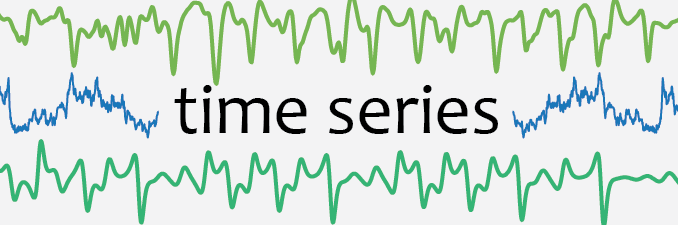

# Starting Off

Imagine you are a financial analyst who wants to try and predict the price of a stock (Apple for example) for the next 10 days. What pieces of information(features) whould you think woudl be helpful in trying to forecast the price of the stock?



# Time Series Analysis

## Agenda:
- Components of time series data
- Stationarity
- ACF and PACF
- Fitting the Model
- Evaluating the Model


The methods of analysis and prediction dealing with data that is serially correlated is **Times Series Modeling**

A time series is a sequential set of data points, measured typically over successive times.

#### Reference
- https://otexts.com/fpp2/

## **Why Can't We Use Linear Regression Techniques?**

**There are four principal assumptions which justify the use of linear regression models for purposes of inference or prediction:**

- Linearity and additivity of the relationship between dependent and independent variables:

- Statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data)

-  Homoscedasticity (constant variance) of the errors

- Normality of the error distribution.

## The Basic Steps in a Forecasting Task

A forecasting task usually involves five basic steps.


**Step 1: Problem definition.**  
- Often this is the most difficult part of forecasting. 
- Defining the problem carefully requires an understanding of the way the forecasts will be used, who requires the forecasts, and how the forecasting function fits within the organisation requiring the forecasts.
- A forecaster needs to spend time talking to everyone who will be involved in collecting data, maintaining databases, and using the forecasts for future planning.

**Step 2: Gathering information.** . 
There are always at least two kinds of information required:   
- Statistical data  
- The accumulated expertise of the people who collect the data and use the forecasts. 

**Step 3: Preliminary (exploratory) analysis.**
- Always start by graphing the data. 
- Are there consistent patterns? 
- Is there a significant trend? 
- Is seasonality important? 
- Is there evidence of the presence of business cycles? 
- Are there any outliers in the data that need to be explained by those with expert knowledge? - How strong are the relationships among the variables available for analysis?

**Step 4: Choosing and fitting models.**
- The best model to use depends on the availability of historical data, the strength of relationships between the forecast variable and any explanatory variables, and the way in which the forecasts are to be used. 
- Common to compare two or three potential models. 

**Step 5: Using and evaluating a forecasting model.**
- Once a model has been selected and its parameters estimated, the model is used to make forecasts. 
- The performance of the model can only be properly evaluated after the data for the forecast period have become available.

### Components of Time Series Data
A time series is affected by four main components, which can be separated from the observed data. These components are: *Trend, Cyclical, Seasonal and Irregular* components.

- **Trend** : The long term movement of a time series. For example, series relating to population growth, number of houses in a city etc. show upward trend.
- **Seasonality** : Fluctuation in the data set that follow a regular pattern due to outside influences. For example sales of ice-cream increase in summer, or daily web traffic.
- **Cyclical** : When data exhibit rises and falls that are not of fixed period.  Think of business cycles which usually last several years, but where the length of the current cycle is unknown beforehand.
- **Irregrular**: Are caused by unpredictable influences, which are not regular and also do not repeat in a particular pattern. These variations are caused by incidences such as war, strike, earthquake, flood, revolution, etc. There is no defined statistical technique for measuring random fluctuations in a time series.


*Note: Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different. If the fluctuations are not of fixed period then they are cyclic; if the period is unchanging and associated with some aspect of the calendar, then the pattern is seasonal.*

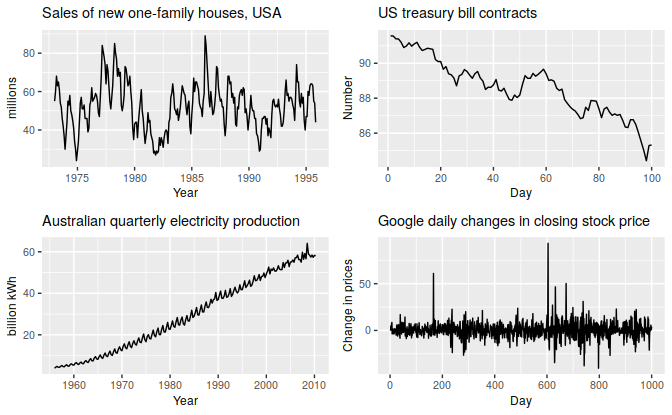

- The monthly housing sales (top left) show strong seasonality within each year, as well as some strong cyclic behaviour with a period of about 6–10 years. There is no apparent trend in the data over this period.
- The US treasury bill contracts (top right) show results from the Chicago market for 100 consecutive trading days in 1981. Here there is no seasonality, but an obvious downward trend. Possibly, if we had a much longer series, we would see that this downward trend is actually part of a long cycle, but when viewed over only 100 days it appears to be a trend.
- The Australian quarterly electricity production (bottom left) shows a strong increasing trend, with strong seasonality. There is no evidence of any cyclic behaviour here.
- The daily change in the Google closing stock price (bottom right) has no trend, seasonality or cyclic behaviour. There are random fluctuations which do not appear to be very predictable, and no strong patterns that would help with developing a forecasting model.

### Statistical stationarity: 

A **stationary time series** is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. 
- Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!  

### Visualizing Homoscedasticity:
    


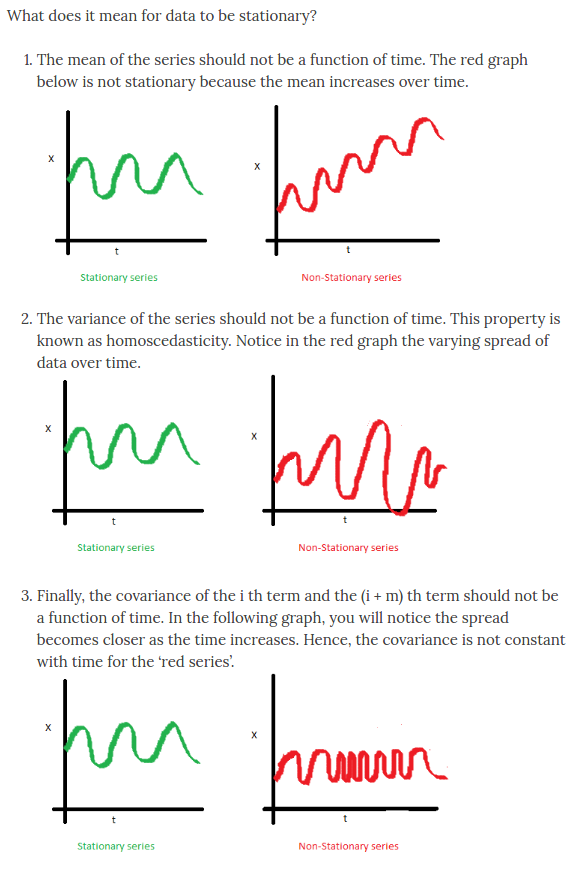

## Two ways to check for stationarity

1. **Plot rolling Statistics**

    We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months.

2. **Dickey-Fuller Test**:
This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

### Model Considerations
- Many time series include trend, cycles and seasonality. 


- When choosing a forecasting method, we will first need to identify the time series patterns in the data, and then choose a method that is able to capture the patterns properly.

##  SARIMA Model

In [ ]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('./resources/Sales_Data.csv', sep='\t', index_col=0)
df.head()

In [ ]:
df.dtypes

In [ ]:
df['purchase_date']= pd.to_datetime(df['purchase_date']) 

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df = df[df['payment_amount']>100]
df.head()

In [ ]:
daily_sales = df.groupby(['purchase_date'])['payment_amount'].sum()

In [ ]:
daily_sales.head()

In [ ]:
daily_sales.plot(figsize=(12,8), title= 'Test Prep Daily Sales', fontsize=14)
plt.show()

In [ ]:
monthly_sales=daily_sales.resample('m').sum()
monthly_sales  = pd.DataFrame(monthly_sales, columns=['payment_amount'])
monthly_sales.plot(figsize=(12,8), title= 'Test Prep Sales: Monthly Sales', fontsize=14)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_sales, freq=12)
#fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

In [ ]:
monthly_sales.head()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# create a function that will help us to quickly


def test_stationarity(timeseries, window):

    # Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    # Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=[
                         'Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
#test the stationarity of the untransformed dataset
test_stationarity(monthly_sales.payment_amount, 12)

### How to Stationarize time series data

- Log Transofrmation
- Deflating the data
- Differencing 

In [ ]:
monthly_sales['natural_log'] = np.log(monthly_sales.payment_amount)
test_stationarity(monthly_sales.natural_log, 12)

#### First Difference

In [ ]:
monthly_sales['first_difference'] = monthly_sales.payment_amount - monthly_sales.payment_amount.shift(1)  
test_stationarity(monthly_sales.first_difference.dropna(inplace=False),12)

#### Seasonal Difference

In [ ]:
monthly_sales['seasonal_difference'] = monthly_sales.payment_amount - monthly_sales.payment_amount.shift(12)  
test_stationarity(monthly_sales.seasonal_difference.dropna(inplace=False), 12)

#### Seasonal Difference of the First Difference

In [ ]:
monthly_sales['seasonal_first_difference'] = monthly_sales.first_difference - monthly_sales.first_difference.shift(12)  
test_stationarity(monthly_sales.seasonal_first_difference.dropna(inplace=False), 12)

#### Season Difference of the log first difference

In [ ]:
monthly_sales['log_first_difference'] = monthly_sales.natural_log - monthly_sales.natural_log.shift(1)  
monthly_sales['log_seasonal_first_difference'] = monthly_sales.log_first_difference - monthly_sales.log_first_difference.shift(12)  

test_stationarity(monthly_sales.log_first_difference.dropna(inplace=False), 12)


Sometimes, we have to difference the differenced data (known as a second difference) to achieve stationary data. The number of times we have to difference our data is the order of differencing - we will use this information when building our model.

### Autoregressive Integrated Moving Average  (ARIMA)

#### Autoregressive term

If the series is stationary and autocorrelated, perhaps it can be predicted as a multiple of its own previous value, plus a constant.  The forecasting equation in this case is:


$$Ŷ_{t}  =  μ  +  ϕ1Y_{t-1}$$

…which is Y regressed on itself lagged by one period. 

####  Moving Average term

Another strategy for correcting autocorrelated errors is to use an average of the last few observations in order to filter out the noise and more accurately estimate the local mean. one of which is the so-called “error correction” form, in which the previous forecast is adjusted in the direction of the error it made:

$$Ŷ_t   =  Ŷ_{t-1}  + αe_{t-1}$$  

Because $e_{t-1} = Y_{t-1} - Ŷ_{t-1}$ by definition, this can be rewritten as:

$$Ŷ_t   =  Y_{t-1}  - (1-α)e_{t-1}$$

$$=  Y_{t-1}  - θ_1e_{t-1}$$



#### Integrated


A seasonal ARIMA model is classified as an **ARIMA(p,d,q)x(P,D,Q)** model, 
```
    p = number of autoregressive (AR) terms 
    d = number of differences 
    q = number of moving average (MA) terms
     
    P = number of seasonal autoregressive (SAR) terms 
    D = number of seasonal differences 
    Q = number of seasonal moving average (SMA) terms
```

One we have achieved stationarity the next step in fitting a model to address any autocorrelation that remains in the differenced series.

## Plot ACF/PACF charts and find optimal parameters.

### Autocorrelation

Just as correlation measures the extent of a linear relationship between two variables, autocorrelation measures the linear relationship between lagged values of a time series.

There are several autocorrelation coefficients, corresponding to each panel in the lag plot. 
- $r_1$ measures the relationship between $y_t$ and $y_{t−1}$. 
- $r_2$ measures the relationship between $y_t$ and $y_{t−2}$, and so on.

The value of  $r_k$ can be written as:


$$r_{k} = \frac{\sum\limits_{t=k+1}^T (y_{t}-\bar{y})(y_{t-k}-\bar{y})}
 {\sum\limits_{t=1}^T (y_{t}-\bar{y})^2}$$
 
 where T is the length of the time series.


### Partial autocorrelation 

- Is the correlation between a point and particular lag without the influence of itermediary lags. This helps us see the direct relationship between certain lags.

- Helps to determine the appropriate lags p in an AR (p) model or in an extended ARIMA (p,d,q) model.

## ACF and PACF

#### on original data

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(monthly_sales.payment_amount.iloc[1:], lags=18, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(monthly_sales.payment_amount.iloc[1:], lags=18, ax=ax2)

#### on first difference

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(monthly_sales.first_difference.iloc[1:], lags=18, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(monthly_sales.first_difference.iloc[1:], lags=18, ax=ax2)

#### on seasonal first difference

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(monthly_sales.seasonal_first_difference.iloc[13:], lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(monthly_sales.seasonal_first_difference.iloc[13:], lags=24, ax=ax2)

Since there is still some correlation between the times series data, we want to include terms that will account for this correlation. 



#### Determinging AR and MA terms


What’s the best way to correct for autocorrelation: adding AR terms or adding MA terms?  

A rule-of-thumb for this situation, 
- positive autocorrelation is usually best treated by adding an AR term to the model
- negative autocorrelation is usually best treated by adding an MA term. 


![alt text](./resources/armaguidelines.png)

#### Rules for Indentifying ARIMA Models

https://people.duke.edu/~rnau/arimrule.htm

## Fitting the Model

In [ ]:
mod = sm.tsa.statespace.SARIMAX(monthly_sales['payment_amount'], trend='n', order=(0,1,1), seasonal_order=(0,1,1,12))
res = mod.fit()
res.summary()

## Evaluating a Time Series Model

Can we use test train split when evaluating this model? 

<img src='https://people.duke.edu/~rnau/randwkf2.gif' width=700 />

-  The data in the **estimation period** are used to help select the model and to estimate its parameters. Forecasts made in this period are not completely "honest" because data on both sides of each observation are used to help determine the forecast. 

- The data in the **validation period** are held out during parameter estimation, and if you are careful you will also withhold these values during the exploratory phase of analysis when you select your model. One-step-ahead forecasts made in this period are often called backtests. Ideally, these are "honest" forecasts, however, if you test a great number of models and choose the model whose errors are smallest in the validation period, you may end up overfitting the data within the validation period as well as in the estimation period.

- **Forecasts into the future** are "true" forecasts that are made for time periods beyond the end of the available data. For a model which is purely extrapolative in nature , it is possible to extend the forecasts an arbitrary number of periods into the future by "bootstrapping" the model: first a one-period-ahead forecast is made, then the one-period-ahead forecast is treated as a data point and the model is cranked ahead to produce a two-period-ahead forecast, and so on as far as you wish.

In [ ]:
monthly_sales['forecast'] = res.predict(start=54, end=72, dynamic=False)
monthly_sales[['payment_amount', 'forecast']].plot(figsize=(16, 12))
plt.show()

In [ ]:
npredict =monthly_sales.payment_amount['2015'].shape[0]
nobs = monthly_sales.payment_amount.shape[0]
 
# Graph
fig, ax = plt.subplots(figsize=(12,6))
npre = 12
ax.set(title='SALES', xlabel='Date', ylabel='dollars')
ax.plot(monthly_sales.index[-npredict-npre+1:], monthly_sales.ix[-npredict-npre+1:, 'payment_amount'], 'o', label='Observed')
ax.plot(monthly_sales.index[-npredict-npre+1:], monthly_sales.ix[-npredict-npre+1:, 'forecast'], 'g', label='Dynamic forecast')
plt.show()

### Mean Absolute Error per prediction

$MAE = \frac{\sum\limits_{i=1}^{n} |y_i - \hat{y}_i|}{n}$ 

```python
sklearn.metrics.mean_absolute_error

In [ ]:
np.abs(monthly_sales['2015']['payment_amount']- monthly_sales['2015']['forecast']).sum()/len(monthly_sales['2015'])

## Now let's predict all of 2016

In order for this to work, we need to extend our current data frame to account for the future time periods we will predict on.

In [ ]:
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("2016-01-31", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= monthly_sales.columns)
monthly_sales = pd.concat([monthly_sales, future])

In [ ]:
res.predict().head()

In [ ]:
monthly_sales['forecast'] = res.predict(start = 72, end = 84, dynamic= True)  
monthly_sales[['payment_amount', 'forecast']].ix[-24:].plot(figsize=(12, 8)) 
plt.savefig('ts_predict_future.png', bbox_inches='tight')

## Application practice with dataset of trasit riders in Portland

In [ ]:
df = pd.read_csv('./resources/portland-oregon-average-monthly-.csv', index_col=0)
df.index.name=None
df.reset_index(inplace=True)
df.drop(df.index[114], inplace=True)